
# Feature Scaling

**Author:** IT24104332 – Fernando R.R.S.J.

This notebook applies standard scaling to numeric features.


Scaled features shape: (6019, 6)


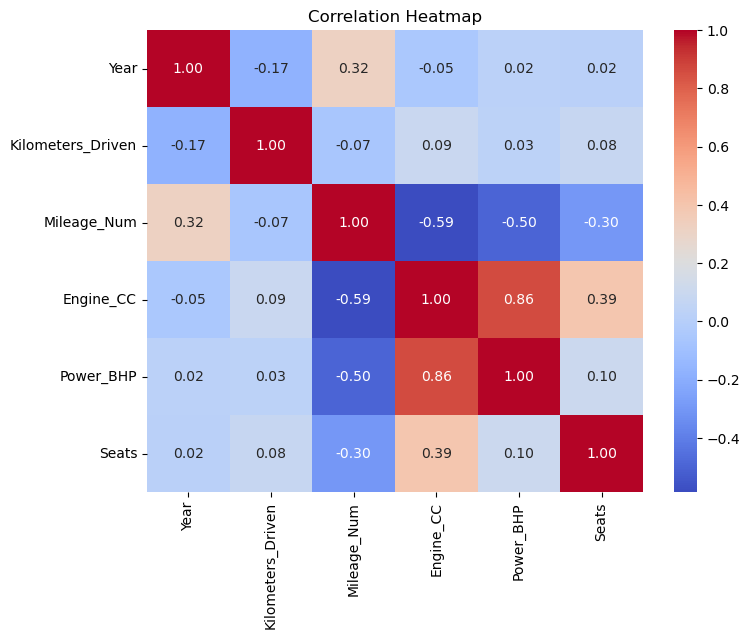

In [13]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

train_df = pd.read_csv('/Users/rayonsenuka/Downloads/AIML Project/train-data.csv' , index_col=False)
test_df = pd.read_csv('/Users/rayonsenuka/Downloads/AIML Project/test-data.csv', index_col=False)


for df in [train_df, test_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
    df.drop_duplicates(inplace=True)

# Convert textual columns to numeric values quickly (similar to earlier notebook)
import re

def parse_numeric(value):
    if pd.isnull(value):
        return np.nan
    match = re.search(r"([0-9]*\.?[0-9]+)", str(value))
    return float(match.group(1)) if match else np.nan

for df in [train_df, test_df]:
    df['Mileage_Num'] = df['Mileage'].apply(parse_numeric)
    df['Engine_CC'] = df['Engine'].apply(parse_numeric)
    df['Power_BHP'] = df['Power'].apply(parse_numeric)

# Impute numeric columns
numeric_features = ['Year','Kilometers_Driven','Mileage_Num','Engine_CC','Power_BHP','Seats']
imputer = SimpleImputer(strategy='median')
train_df[numeric_features] = imputer.fit_transform(train_df[numeric_features])

# Scale
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df[numeric_features])
print('Scaled features shape:', train_scaled.shape)

#EDA Visualization
plt.figure(figsize=(8,6))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
